# Homework 2

### This is the solution of:
* Student1
* Student2
* Student3


The same general rules as for Homework 1 applies.

$\newcommand{\dx}{\,\mathrm{d}x}$

## Problem 1 (Finite Difference Method in 2D)

 **a)** Let $\Omega = (0,1)\times (0,1)$.
For the functions $u_k(x,y) = \sin(2 \pi k x) \sin(2 \pi k y)$ with frequency $k \in \mathbb{N}$,
compute analytically the right-hand side $f$ and boundary data $g$
such that $u_k$ satisfies the Poisson problem
\begin{align*}
- \Delta u_k  &= f \quad \text{in } \Omega,
\\
 u_k &= g \quad \text{on } \partial \Omega.
\end{align*}

__ANSWER:__

For $k=2$, we have that
\begin{align}
    &\Delta u_{2} = \frac{\partial^{2} u_{2}}{\partial x^{2}} + \frac{\partial^{2} u_{2}}{\partial y^{2}}\\
    = &-(4\pi)^{2}\sin(4\pi x)\sin(4\pi y)-(4\pi)^{2}\sin(4\pi x)\sin(4\pi y) \\
    = & -32\pi^{2}\sin(4\pi x)\sin(4\pi y),
\end{align}
which means that 
\begin{align}
    f = 32\pi^{2}\sin(4\pi x)\sin(4\pi y).
\end{align}

In order to determine $g$, we have to consider what values of $x,y \in \partial \Omega$. On the boundary $\partial \Omega$, both $x$ and $y$ are either 0 or 1. Inserting the possible boundary values into $u_{2}$ we find that 
\begin{align}
    g = 0
\end{align}

**b)** Based on the code snippets below, implement a finite difference scheme to solve the problem given in a) for $k = 2$ numerically. For the computational grid, assume equally spaced subdivisions in $x$ and $y$ direction, starting with $N=8$ subintervals in each spatial direction. For $N = 8, 16, 32, 64$, compute and plot the finite difference solution $U$.

### Code Snippets

In [12]:
# Array and stuff 
import numpy as np
# Linear algebra solvers from scipy
import scipy.linalg as la
# Basic plotting routines from the matplotlib library 
import matplotlib.pyplot as plt
# We also need access to the colormaps for 3D plotting
from matplotlib import cm

#2D-PLOT
def plot2D(X, Y, Z, title=""):
    # Define a new figure with given size 
    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = fig.add_subplot(111, projection='3d') 
    surf = ax.plot_surface(X, Y, Z,             
                           rstride=1, cstride=1, # Sampling rates for the x and y input data
                           cmap=cm.viridis)      # Use the new fancy colormap viridis
    # Set initial view angle
    ax.view_init(30, 225)
    
    # Set labels and show figure
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_title(title)
    plt.show()




#FORCING FUNCTION GIVEN IN INSTRUCTIONS
def f_task1(x,y,k):
    f = 8*k**2*np.pi**2*np.sin(2*k*np.pi*x)*np.sin(2*k*np.pi*y)
    return f

#SOLVER
def fdm_poisson_2d_dense(N, k):

    ##### Compute right hand side####     
    x,y = np.ogrid[0:1:(N+1)*1j, 0:1:(N+1)*1j]
    
    # Evaluate f on the grid. 
    F_grid = np.zeros((N+1, N+1))
    #loop over interior
    for i in range(1, N):
        for j in range(1,N):
            #index [i,0] since np.ogrid produces a column vector followed by a row vector
            F_grid[i,j] = f_task1(x[i,0],y[0,j],k)
            
    #Set values on the boundary. -1 is the index of the last element. 
    #So first we set column 1 and N to zero and then rows 1 and N. 
    F_grid[0:N,[0, -1]] = 0;
    F_grid[[0,-1],0:N] = 0;

    # Now we define our rhs by flattening out F, making it a 1 dimensional array of length (N+1)*(N+1). 
    F = F_grid.ravel()  
    
    ####Create Matrix entries for unknowns associated with inner grid points.####
    
    #Map function to translate double index into a proper numbering
    def m(i,j):
        #map the 2D indexing to 1D to represent vector v
        k = (N+1)*j+i
        return k
    
    # Total number of unknowns is M = (N+1)*(N+1)
    M = (N+1)**2
    
    # Allocate a (full!) MxM matrix filled with zeros
    A = np.zeros((M,M))
    
    # Meshsize h
    h = 1/N
    hh = h*h
    
    # Compute matrix A entries by iterating over the *inner* grid points first.
    for i in range(1,N):      # i is the row number for the grid point
        for j in range(1,N):  # j is the column number for the grid point
            # Compute the index of the unknown at grid point (i,j). 
            # This is also the index of the row in matrix A we want to fill. 
            ri = m(i,j)       
            A[ri,ri] = 4 # U_ij
            A[ri,m(i-1,j)] = -1  # U_{i-1,j}
            A[ri,m(i+1,j)] = -1    # U_{i+1,j}
            A[ri,m(i,j-1)] = -1    # U_{i,j-1}
            A[ri,m(i,j+1)] = -1    # U_{i,j+1}
    
    ##### Incorporate boundary conditions #####
    # Boundary condition 
    for i in [0, N]:
        for j in range(0,N+1):
            # Define row index related to unknown U_m(i,j)
            ri = m(i,j)
            A[ri,ri] = 1 
    
    
    # Boundary condition 
    for j in [0, N]:
        for i in range(0,N+1):
            # Define row index related to unknown U_m(i,j)
            ri = m(i,j)
            A[ri,ri] = 1     

    #Rescale interior
    A = A/hh
    
    ##### Solve linear systems ######
    # Solve linear algebra system 
    U = la.solve(A,F)
    
    # Reshape the flat solution vector U to make it a grid function
    U_grid = U.reshape((N+1,N+1))
    
    # Return solution and x and y grid points for easy plotting
    return (x,y,U_grid)


    




**c**) Compute the experimental order of convergence (EOC)
for $N = 16, 32, 64$ using $\max_{i} |U-u|$ as error measure. Summarize your results in a table. 
What convergence rate do you get? If you don't get an EOC very close to $2$, find the bugs in your code :)

,Error
N,
8,0.233701
16,0.053029
32,0.012951
64,0.003219


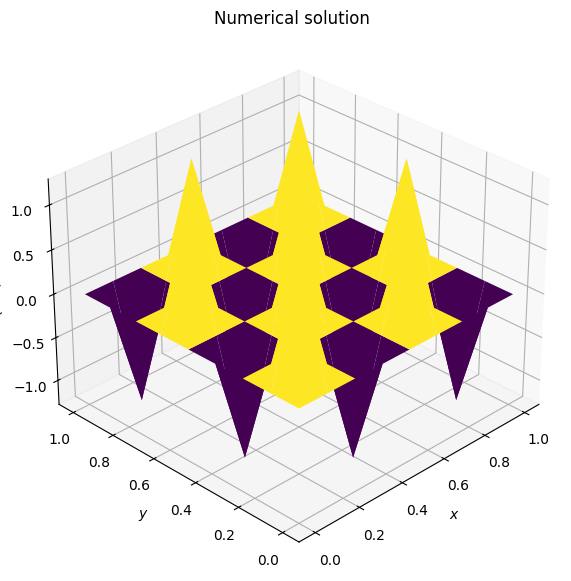

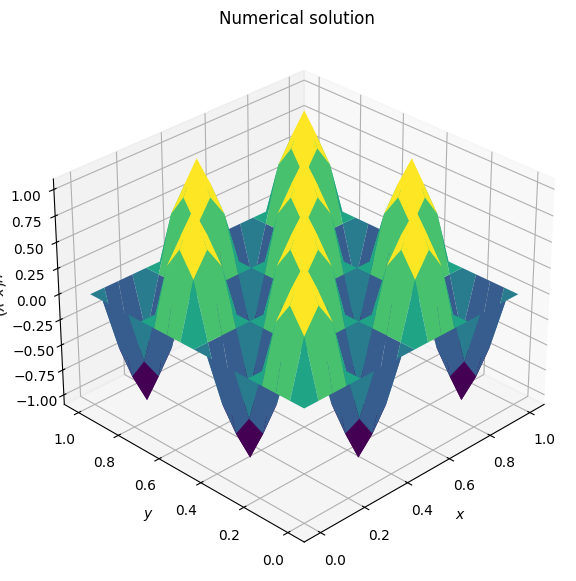

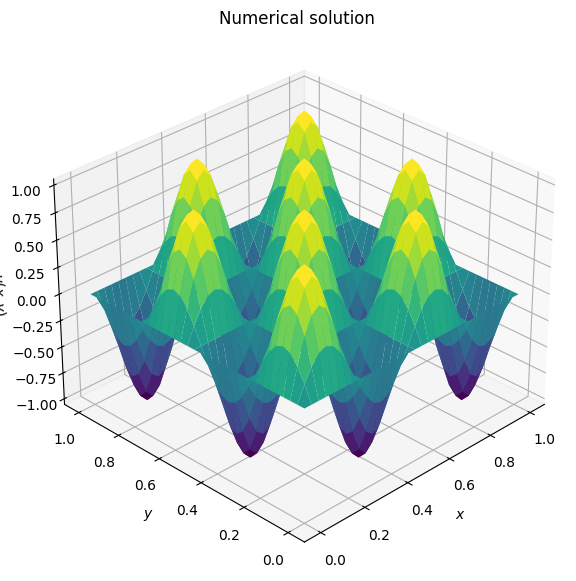

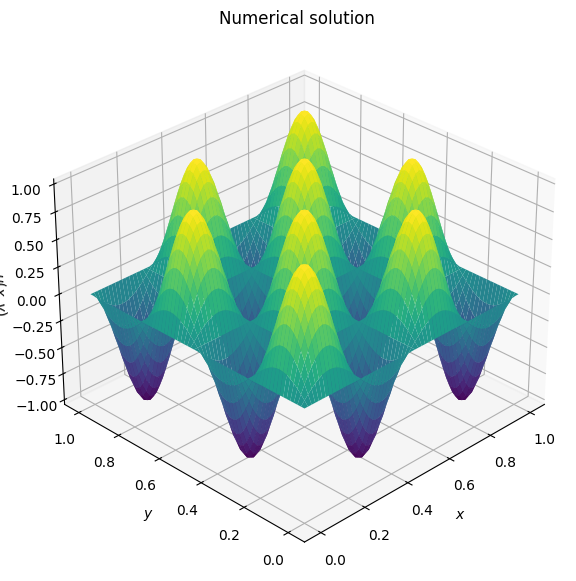

In [13]:


import pandas as pd
#Function U
def U_anal(x,y,k):
    u = np.sin(2*k*np.pi*x)*np.sin(2*k*np.pi*y)
    return u

#ERROR ANALYSIS
c = 0
error = np.zeros(4)
U_list = []
x_list = []
y_list = [] 
N_arr = np.array([8,16,32,64])
for N in N_arr:
    
    
    k = 2
    x,y,U = fdm_poisson_2d_dense(N, k)
    #plot2D(x, y, U, title="Numerical solution")
    #Append results to list in order to plot later
    U_list.append(U)
    x_list.append(x)
    y_list.append(y)
    
    
    ##EXACT SOLUTION 
    U_exact = np.zeros((N+1, N+1))
    
    for i in range(0, N+1):
            for j in range(0,N+1):
                U_exact[i,j] = U_anal(x[i,0],y[0,j],k)
                
    #plot2D(x, y, U_exact, title="Exact solution")
    
    #ERROR ANALYSIS
    E = np.abs(U_exact-U)
    error[c] = E.max()
    c = c+1


    
#TABLE
data = {"Error":error}

df = pd.DataFrame(data, index=N_arr)
df = df[["Error"]]
df = df.round(6)
df.index.name="N"
display(df.style.set_caption("Table 1: Error"))

#Plot figures
for i in range(0,len(N_arr)):
    plot2D(x_list[i], y_list[i], U_list[i], title="Numerical solution")





__ANSWER:__

In table 1, we can clearly see that halving the grid size $h$ leads to a factor 4 decrease in the error, thus indicating EOC = 2. 

**d**) Test how large you can choose the resolution $N$ until either the problem takes too long (say 5 minutes) to compute or uses too much memory. Explain, what happens. Why does the problem
scale so badly with respect to $N$?

__ANSWER:__

From some test runs we found that it took 2 minutes to solve the system for N = 128 and >5 minutes for N = 256, indicating that the system becomes too computationally heavy to solve for some $128<N<256$. Why is this?



The size of matrix $A$ is $M \times M$, where $M = (N+1)^2$, which means that the size of $A$ scales  like
\begin{align}
    \dim(A) \sim N^{4}.
\end{align}
The number of operations needed to solve a linear system with general matrix $M$ of dimensions $N \times N$ scales like
\begin{align}
    Flops_{M} \sim N^{3}
\end{align}
Using LU-factoriztion. Some matrices require far fewer operations if the structure is well-defined and we are able to use a different algorithm. 
The matrix $A$ in question has a well-defined structure and might not need $\sim N^{3}$ many operations. But in the worst case scenario, the number of operations to solve a system of this size is
\begin{align}
    Flops_{A} \sim ((N+1)^2)^3 \sim N^{6}.
\end{align}






**e**) Based on your implementation, we now implement a finite difference using *sparse* matrices. Knowing the structure and entries of the matrix a priori, the most efficient 
realization would be based on (block) tridiagonal sparse matrices. 
But anticipating the forthcoming task of implementing schemes based on the finite element method, we will take a middle ground and simply switch to a flexible sparse matrix format which allows
for minimal adjustments of your previous solver implementation.
To this end, you shall incorporate the following code snippets into your code.

### Code Snippets

In [48]:
#Task 1e)

import scipy.sparse as sp
from scipy.sparse.linalg import spsolve


def fdm_poisson_2d_sparse(N,k):
    
    # Compute right-hand side     
    x,y = np.ogrid[0:1:(N+1)*1j, 0:1:(N+1)*1j]
    
    # Evaluate f on the grid. 
    F_grid = np.zeros((N+1, N+1))
    #loop over interior
    for i in range(1, N):
        for j in range(1,N):
            #index [i,0] since np.ogrid produces a column vector followed a row vector
            F_grid[i,j] = f_task1(x[i,0],y[0,j],k)
    #Set values on the boundary. -1 is the index of the last element. 
    #So first we set column 1 and N to zero and then rows 1 and N. 
    F_grid[0:N,[0, -1]] = 0;
    F_grid[[0,-1],0:N] = 0;


    # Now we define our rhs by flattening out F, making it a 1-dimensional array of length (N+1)*(N+1). 
    F = F_grid.ravel()  
    
    
    # To translate the grid based double index into a proper numbering, we define a 
    # small mapping function, assuming a row-wise numbering. 
    def m(i,j):
        #map the 2D indexing to 1D to represent vector v
        k = (N+1)*j+i
        return k
    
    # Total number of unknowns is M = (N+1)*(N+1)
    M = (N+1)**2
    
    # A new structure of matrix used in order to take the sparseness into account. 
    A = sp.dok_matrix((M, M))
    
    # Meshsize h
    h = 1/N
    hh = h*h
    
    # Compute matrix A entries by iterating over the *inner* grid points first.
    for i in range(1,N):      # i is the row number for the grid point
        for j in range(1,N):  # j is the column number for the grid point
            # Compute the index of the unknown at grid point (i,j). 
            # This is also the index of the row in matrix A we want to fill. 
            ri = m(i,j)       
            A[ri,ri] = 4 # U_ij
            A[ri,m(i-1,j)] = -1  # U_{i-1,j}
            A[ri,m(i+1,j)] = -1    # U_{i+1,j}
            A[ri,m(i,j-1)] = -1    # U_{i,j-1}
            A[ri,m(i,j+1)] = -1    # U_{i,j+1}
    
    # Incorporate boundary conditions
    for i in [0, N]:
        for j in range(0,N+1):
            # Define row index related to unknown U_m(i,j)
            ri = m(i,j)
            A[ri,ri] = 1 
            
    
    
    # Boundary condition 
    for j in [0, N]:
        for i in range(0,N+1):
            # Define row index related to unknown U_m(i,j)
            ri = m(i,j)
            A[ri,ri] = 1   
            
    #Rescale interior
    A = A/hh

    
    # Solve linear algebra system 
    A_csr = A.tocsr() 
    U = spsolve(A_csr, F)
    
    # Reshape the flat solution vector U to make it a grid function
    U_grid = U.reshape((N+1,N+1))
    
    # Return solution and x and y grid points for easy plotting
    return (x,y,U_grid)
    

**f**) Measure and compare the overall solution time for your two implementations 'fdm_poisson_2d_dense' and 'fdm_poisson_2d_sparse' by using the cell magic command %%timeit.
Here is a simple example of its usage. Simply execute the next cell.

In [78]:
#TASK 1f)
k = 2
N_arr = [8,16,32,64,128]
for N in N_arr:
    func1_time = %timeit -o -q fdm_poisson_2d_sparse(N,k)
    func2_time = %timeit -o -q fdm_poisson_2d_dense(N,k)
    print(f"Sparse time for N = {N} = {func1_time}")
    print(f"Dense time for N = {N} = {func2_time}")
    

Sparse time for 8 = 3.49 ms ± 208 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Dense time for 8 = 516 μs ± 4.89 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Sparse time for 16 = 13 ms ± 179 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Dense time for 16 = 2.49 ms ± 36 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Sparse time for 32 = 53.2 ms ± 2.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Dense time for 32 = 38.3 ms ± 488 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Sparse time for 64 = 218 ms ± 4.82 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Dense time for 64 = 1.29 s ± 54.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Sparse time for 128 = 921 ms ± 23.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Dense time for 128 = 41.6 s ± 1.32 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


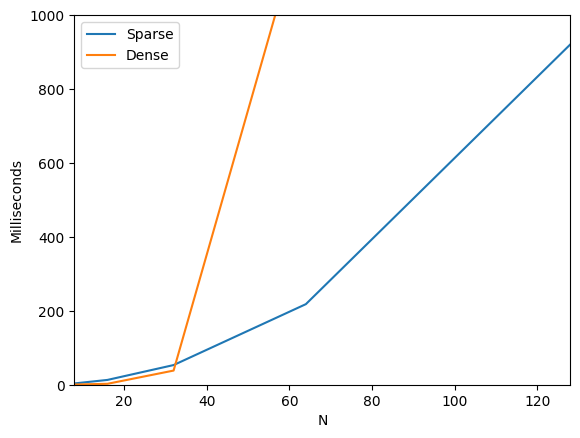

In [9]:

sparse_times = np.array([3.49, 13, 53.2, 218, 921])
dense_times = np.array([516.*10**(-3), 2.49, 38.3, 1290, 4160])

N_arr = [8,16,32,64,128]
plt.plot(N_arr, sparse_times)
plt.plot(N_arr, dense_times)
#plt.plot(N_arr, sparse_times/des_times)
plt.ylim([0, 1000])
plt.xlim([N_arr[0], N_arr[-1]])
plt.legend(["Sparse", "Dense"])
plt.xlabel("N")
plt.ylabel("Milliseconds")
plt.show()



__ANSWER:__
It is apparent from the figure that the new method is much more efficient when solving a sparse linear system. Worth noting is that the sparse solver is a little bit slower than the dense one for $N < 32$.

## Problem 2 (Quadrature Rules)

**a)** Write computer functions which compute the integral $\int_a^b f(x) \dx$ 
for a given $f$ and interval $[a,b]$ using the mid-point, trapezoidal and Simpson's rule.

**b)** For the monomial functions $p_i(x) = x^i$ and $i = 1,2,3$,
compute the integral $\int_0^1 p_i(x) \dx$ numerically using all three quadrature schemes.
Compute the exact integrals analytically and compute the quadrature error
$$
\text{err}(p_i, Q) = \left| \int_I p_i \dx - Q(p_i, I) \right|
$$

for each combination of quadrature rule and monomial. Summarize your result in
a table (quadrature rules as column header, monomials as row headers. You may use pandas library, see below.) Why does some quadrature error vanish? 

In [1]:
import pandas as pd

data = {'midpoint': [0, 0, 0],
        'Trapezoid': [0, 0, 0],
        'Simpson': [0, 0, 0]
        }

df = pd.DataFrame(data, index=['monomial_order_1','monomial_order_2','monomial_order_3'])

print (df)

                  midpoint  Trapezoid  Simpson
monomial_order_1         0          0        0
monomial_order_2         0          0        0
monomial_order_3         0          0        0


**c)** Divide $[0,1]$ into 2, 4 and then 8 equally spaced subintervals.
For those combinations of quadrature rules/monomials where the quadrature error does not vanish, compute a better approximation of the integral $\int_0^1 p_i(x) \dx$
by applying the corresponding quadrature rule separately on each of the 2, 4, 8 subintervals.
What experimental order of convergence do you observe for the quadrature rule/monomial pairs? 

## Problem 3 (Piecewise Linear Interpolation)

Let $0 = x_0 < x_1 < x_2 < \ldots < x_{N} = 1$ be a partition of the interval
$0\leq x\leq 1$ into $N$ subintervals of equal length $h$.  Moreover,
let $\{ \varphi_j\}_{j=0}^{N}$ be the set of hat basis functions of $V_h$
associated with the $N+1$ nodes $x_j$, $j = 0,1\ldots, N$, such that
\begin{align}
  \varphi_i(x_j) =
  \left \{ 
  \begin{array}{l}
    1, \quad \mbox{if } i = j, \\
    0, \quad \mbox{if } i \neq j.
  \end{array}
  \right .
\end{align}
The explicit expression for a hat function $\varphi_i(x)$ is given by 
\begin{align} 
  \varphi_i(x) =
  \left\{
  \begin{array}{ll}
    (x-x_{i-1})/h, &\mbox{if } x_{i-1} \leq x \leq x_i,\\
    (x_{i+1}-x)/h, & \mbox{if } x_i \leq x \leq x_{i+1},\\
    0, & \mbox{otherwise.} 
  \end{array}
  \right. 
\end{align}

**a)** Write a Python function that computes and returns the hat functions $\varphi_i$, $i=0,1,\dots,N$, where ${\texttt{xn}}$ is a vector containing the $N+1$ nodal points,
and $\texttt{x}$ is an array of points you want to evaluate hat function
$\varphi_i$ at. Then, plot $\varphi_2$ and $\varphi_N$ in partitions with $N=4,7,10$. (Use a finer sampling of $[0,1]$ than given by the nodal points for the plotting!)

### Code Snippet

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def hatfun(xn, i, x):
    y = np.zeros(x.size)
    N = xn.size-1
    
    # Make indexing work for zero dim array
    if x.ndim == 0:
        x = np.array([x])
    
    for j in range(0, y.size):
        # Left boundary
        if i == 0:
            if  xn[0] <= x[j] and x[j] <= xn[1]:
                y[j] = (xn[1] - x[j])/(xn[1] - xn[0])
        # Right boundar
        elif i == N:
            if  ...:
                y[j] = ...
        # Interior point
        elif xn[i-1] <= x[j] and x[j] <= xn[i+1]:
            if  ... :
                y[j] = ...
            else:
                y[j] = ...
    return y


**b**) Write a Python script ${\texttt { interp1d(f, xn, x)}}$, that computes the linear interpolant $\pi f_k\in V_h$, $k=1,2,3$ of 

* $f_1(x)=x\sin (3\pi x)$
* $f_2(x)=2-10x$
* $f_3(x)=x(1-x)$

by using your function ${\texttt {hatfun}}$. 

Hint: Recall that the interpolant is defined by
$$
\pi f(x) = \sum_{i=0}^{N} f(x_i) \varphi_i(x)
$$
Compute the error in the numerical solution using the $L^2$-norm
$
    \left(\| v \|_{L^2(I)}= \left( \int_I v^2 \right)^{1/2}\right)
$
and present the results in Log-Log plots (error versus $h$) using partitions with $N=2^2,2^3,...,2^6$. Do the errors behave as  
$$
\| f - \pi f \|_{L^2(I)}^2 \leqslant C \sum_{i=0}^{N} h_i^4 \| f'' \|_{L^2(I_i)}^2
$$
for all cases? If not, explain why. 
*Hint*: Use the code for the Simpson's formula to compute the $L^2$-norm per interval in the partition.